In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    # Choose between models
from sklearn import preprocessing    # Scaling, transforming and wrangling data
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline    # Cross-validation
from sklearn.model_selection import GridSearchCV    # Cross-validation
from sklearn.metrics import mean_squared_error, r2_score    # Evaluation
#from sklearn.externals import joblib    # Persist the model. Alternative to pickle. Better for large numpy arrays

In [2]:
dataset_url = 'C:/Users/USER\Desktop/Decision/adult.csv'
data = pd.read_csv(dataset_url, sep=',')    # Load from remote

In [3]:
print (data.head)
print (data.shape)

<bound method NDFrame.head of        age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

       occupation   r

In [4]:
print(data.describe())
data.replace("?",np.nan,inplace=True)
data.dropna(inplace=True)
data['age'] = data['age'].astype(int)
data['hours-per-week'] = data['hours-per-week'].astype(int)
data.loc[data['class'] == '<=50K', 'class'] = 0
data.loc[data['class'] == '>50K', 'class'] = 1

                age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [5]:
data

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

       occupation   relationship   race     sex  capital-gain  capital-loss  \
0       Bachelors  Not-in-family  White    Male          2174             0   
1       Bachelors        Husband  White    Male             0             0   
2         HS-grad  Not-in-family  White    Male             0             0   
3            11th        Husband  Black    Male             0             0   
4       Bachelors           Wife  Black  Female             0             0   
...           ...            ...    ...     ...           ...           ...   
32556  Assoc-acdm           Wife  White  Female             0             0   
32557     HS-grad        Husband  White    Male             0             0   
32558     HS-grad      Unmarried  White  Female             0             0   
32559     HS-grad      Own-child  White    Male             0             0   
32560     HS-grad           Wife  White  Female         15024             0   

       hours-per-week native-country class  
0                  40  United-States     0  
1                  13  United-States     0  
2                  40  United-States     0  
3                  40  United-States     0  
4                  40           Cuba     0  
...               ...            ...   ...  
32556              38  United-States     0  
32557              40  United-States     1  
32558              40  United-States     0  
32559              20  United-States     0  
32560              40  United-States     1  

[30169 rows x 14 columns]

In [6]:
data_categorical= [i for i in data.columns
                       if data[i].dtype.name == 'object']
data_numerical = [i for i in data.columns
                     if data[i].dtype.name != 'object']

In [7]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [8]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [9]:
X=data.drop(['class'], axis=1)
y=data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)
X.shape

(30169, 13)

In [10]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# XGBoost / RandomizedSearchCV
import xgboost as xgb

# you should consider parma : 
# 1. booster [default=gbtree]
# 2. num_feature [default=MAX]
# 3. alpha, lambda
param = {
        'n_estimators' : 100,
        'max_depth' : 5,
        'learning_rate' : 0.1,
        'colsample_bytree' : 0.8,
        'subsample' : 0.8,
        'gamma' : 0,
        'min_child_weight' : 1
}

In [12]:
xgtrain = xgb.DMatrix(X_train, label=y_train)
xgtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
num_rounds = 100
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
xgb_model = xgb.train(param, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)

[20:27:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.47456	test-rmse:0.47468
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 20 rounds.
[1]	train-rmse:0.45108	test-rmse:0.45136
[2]	train-rmse:0.43179	test-rmse:0.43244
[3]	train-rmse:0.41330	test-rmse:0.41432
[4]	train-rmse:0.39781	test-rmse:0.39918
[5]	train-rmse:0.38449	test-rmse:0.38628
[6]	train-rmse:0.37395	test-rmse:0.37583
[7]	train-rmse:0.36551	test-rmse:0.36772
[8]	train-rmse:0.35729	test-rmse:0.35989
[9]	train-rmse:0.35071	test-rmse:0.35346
[10]	train-rmse:0.34477	test-rmse:0.34790
[11]	train-rmse

In [14]:
y_pred = xgb_model.predict(xgtest)

In [15]:
xgb_model.attributes()

{'best_iteration': '99',
 'best_msg': '[99]\ttrain-rmse:0.29715\ttest-rmse:0.30989',
 'best_score': '0.309889'}

In [16]:
xgb_model.get_score()

{'f6': 223,
 'f3': 313,
 'f11': 323,
 'f0': 481,
 'f10': 307,
 'f2': 160,
 'f9': 335,
 'f5': 19,
 'f7': 83,
 'f1': 162,
 'f4': 175,
 'f12': 116,
 'f8': 44}

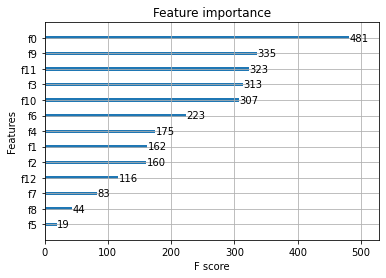

In [17]:
xgb.plot_importance(xgb_model)

In [18]:
import sklearn.metrics as metrics
predictions = [round(value) for value in y_pred]
acc =  metrics.accuracy_score(y_test, predictions)*100
print('\nAccuracy: %.2f %%\n' % acc)


Accuracy: 86.00 %



In [19]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test, y_pred))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE 0.09603141512767298
RMES 0.3098893594941152
